In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('parkinsons.csv')

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
49915,phon_R01_S50_2,216.724878,218.848030,106.848330,0.003417,0.000016,0.001874,0.001608,0.004609,0.018562,...,0.029725,0.007732,24.478507,0,0.457684,0.665491,-6.919550,0.166218,2.195460,0.115060
49916,phon_R01_S50_3,139.383457,233.446129,122.545508,0.004173,0.000024,0.001527,0.002163,0.004809,0.014844,...,0.032885,0.008470,25.689257,0,0.429193,0.678586,-7.085170,0.143165,2.327750,0.142278
49917,phon_R01_S50_4,142.838884,164.121441,142.831336,0.003069,0.000017,0.001681,0.001550,0.004202,0.019759,...,0.033236,0.009020,25.184618,0,0.475257,0.661888,-6.452211,0.122596,2.320571,0.133969
49918,phon_R01_S50_5,198.539585,200.670620,115.821643,0.004218,0.000014,0.001662,0.002182,0.004189,0.018521,...,0.032074,0.008123,25.489967,0,0.402376,0.709122,-7.186943,0.167651,2.241980,0.119959
49919,phon_R01_S50_6,158.717535,209.114883,102.700560,0.003877,0.000023,0.001815,0.001833,0.005553,0.015628,...,0.030928,0.008651,24.908325,0,0.375499,0.739693,-7.038189,0.174750,2.065105,0.124197


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49920 entries, 0 to 49919
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              49920 non-null  object 
 1   MDVP:Fo(Hz)       49920 non-null  float64
 2   MDVP:Fhi(Hz)      49920 non-null  float64
 3   MDVP:Flo(Hz)      49920 non-null  float64
 4   MDVP:Jitter(%)    49920 non-null  float64
 5   MDVP:Jitter(Abs)  49920 non-null  float64
 6   MDVP:RAP          49920 non-null  float64
 7   MDVP:PPQ          49920 non-null  float64
 8   Jitter:DDP        49920 non-null  float64
 9   MDVP:Shimmer      49920 non-null  float64
 10  MDVP:Shimmer(dB)  49920 non-null  float64
 11  Shimmer:APQ3      49920 non-null  float64
 12  Shimmer:APQ5      49920 non-null  float64
 13  MDVP:APQ          49920 non-null  float64
 14  Shimmer:DDA       49920 non-null  float64
 15  NHR               49920 non-null  float64
 16  HNR               49920 non-null  float6

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,...,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000,49920.000000
mean,151.332316,185.894255,111.743678,0.005289,0.000039,0.002714,0.002931,0.008133,0.027260,0.252031,...,0.043182,0.015433,22.227250,0.755769,0.501820,0.718522,-5.706478,0.228489,2.358678,0.197562
std,24.428979,27.075598,21.847650,0.001389,0.000014,0.000834,0.000842,0.002498,0.008401,0.078968,...,0.013560,0.007457,1.971112,0.429634,0.058145,0.026343,0.725978,0.049697,0.176466,0.051477
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,132.854304,166.734353,96.322963,0.004230,0.000030,0.002044,0.002217,0.006123,0.019488,0.180501,...,0.031191,0.008916,20.551130,1.000000,0.459345,0.698793,-6.027882,0.200260,2.231725,0.170832
50%,147.889932,184.505014,109.064397,0.005229,0.000040,0.002729,0.002927,0.008161,0.026506,0.245463,...,0.041306,0.015070,22.349724,1.000000,0.498478,0.718753,-5.575985,0.234856,2.345088,0.205587
75%,162.865137,201.235294,121.543831,0.006454,0.000050,0.003418,0.003642,0.010227,0.034594,0.320758,...,0.054958,0.021506,23.733274,1.000000,0.550240,0.739382,-5.120416,0.269106,2.505709,0.239853
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
null_counts=df.isnull().sum()
print(null_counts)

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [8]:
df.duplicated().sum()

0

# Before Capping outilers

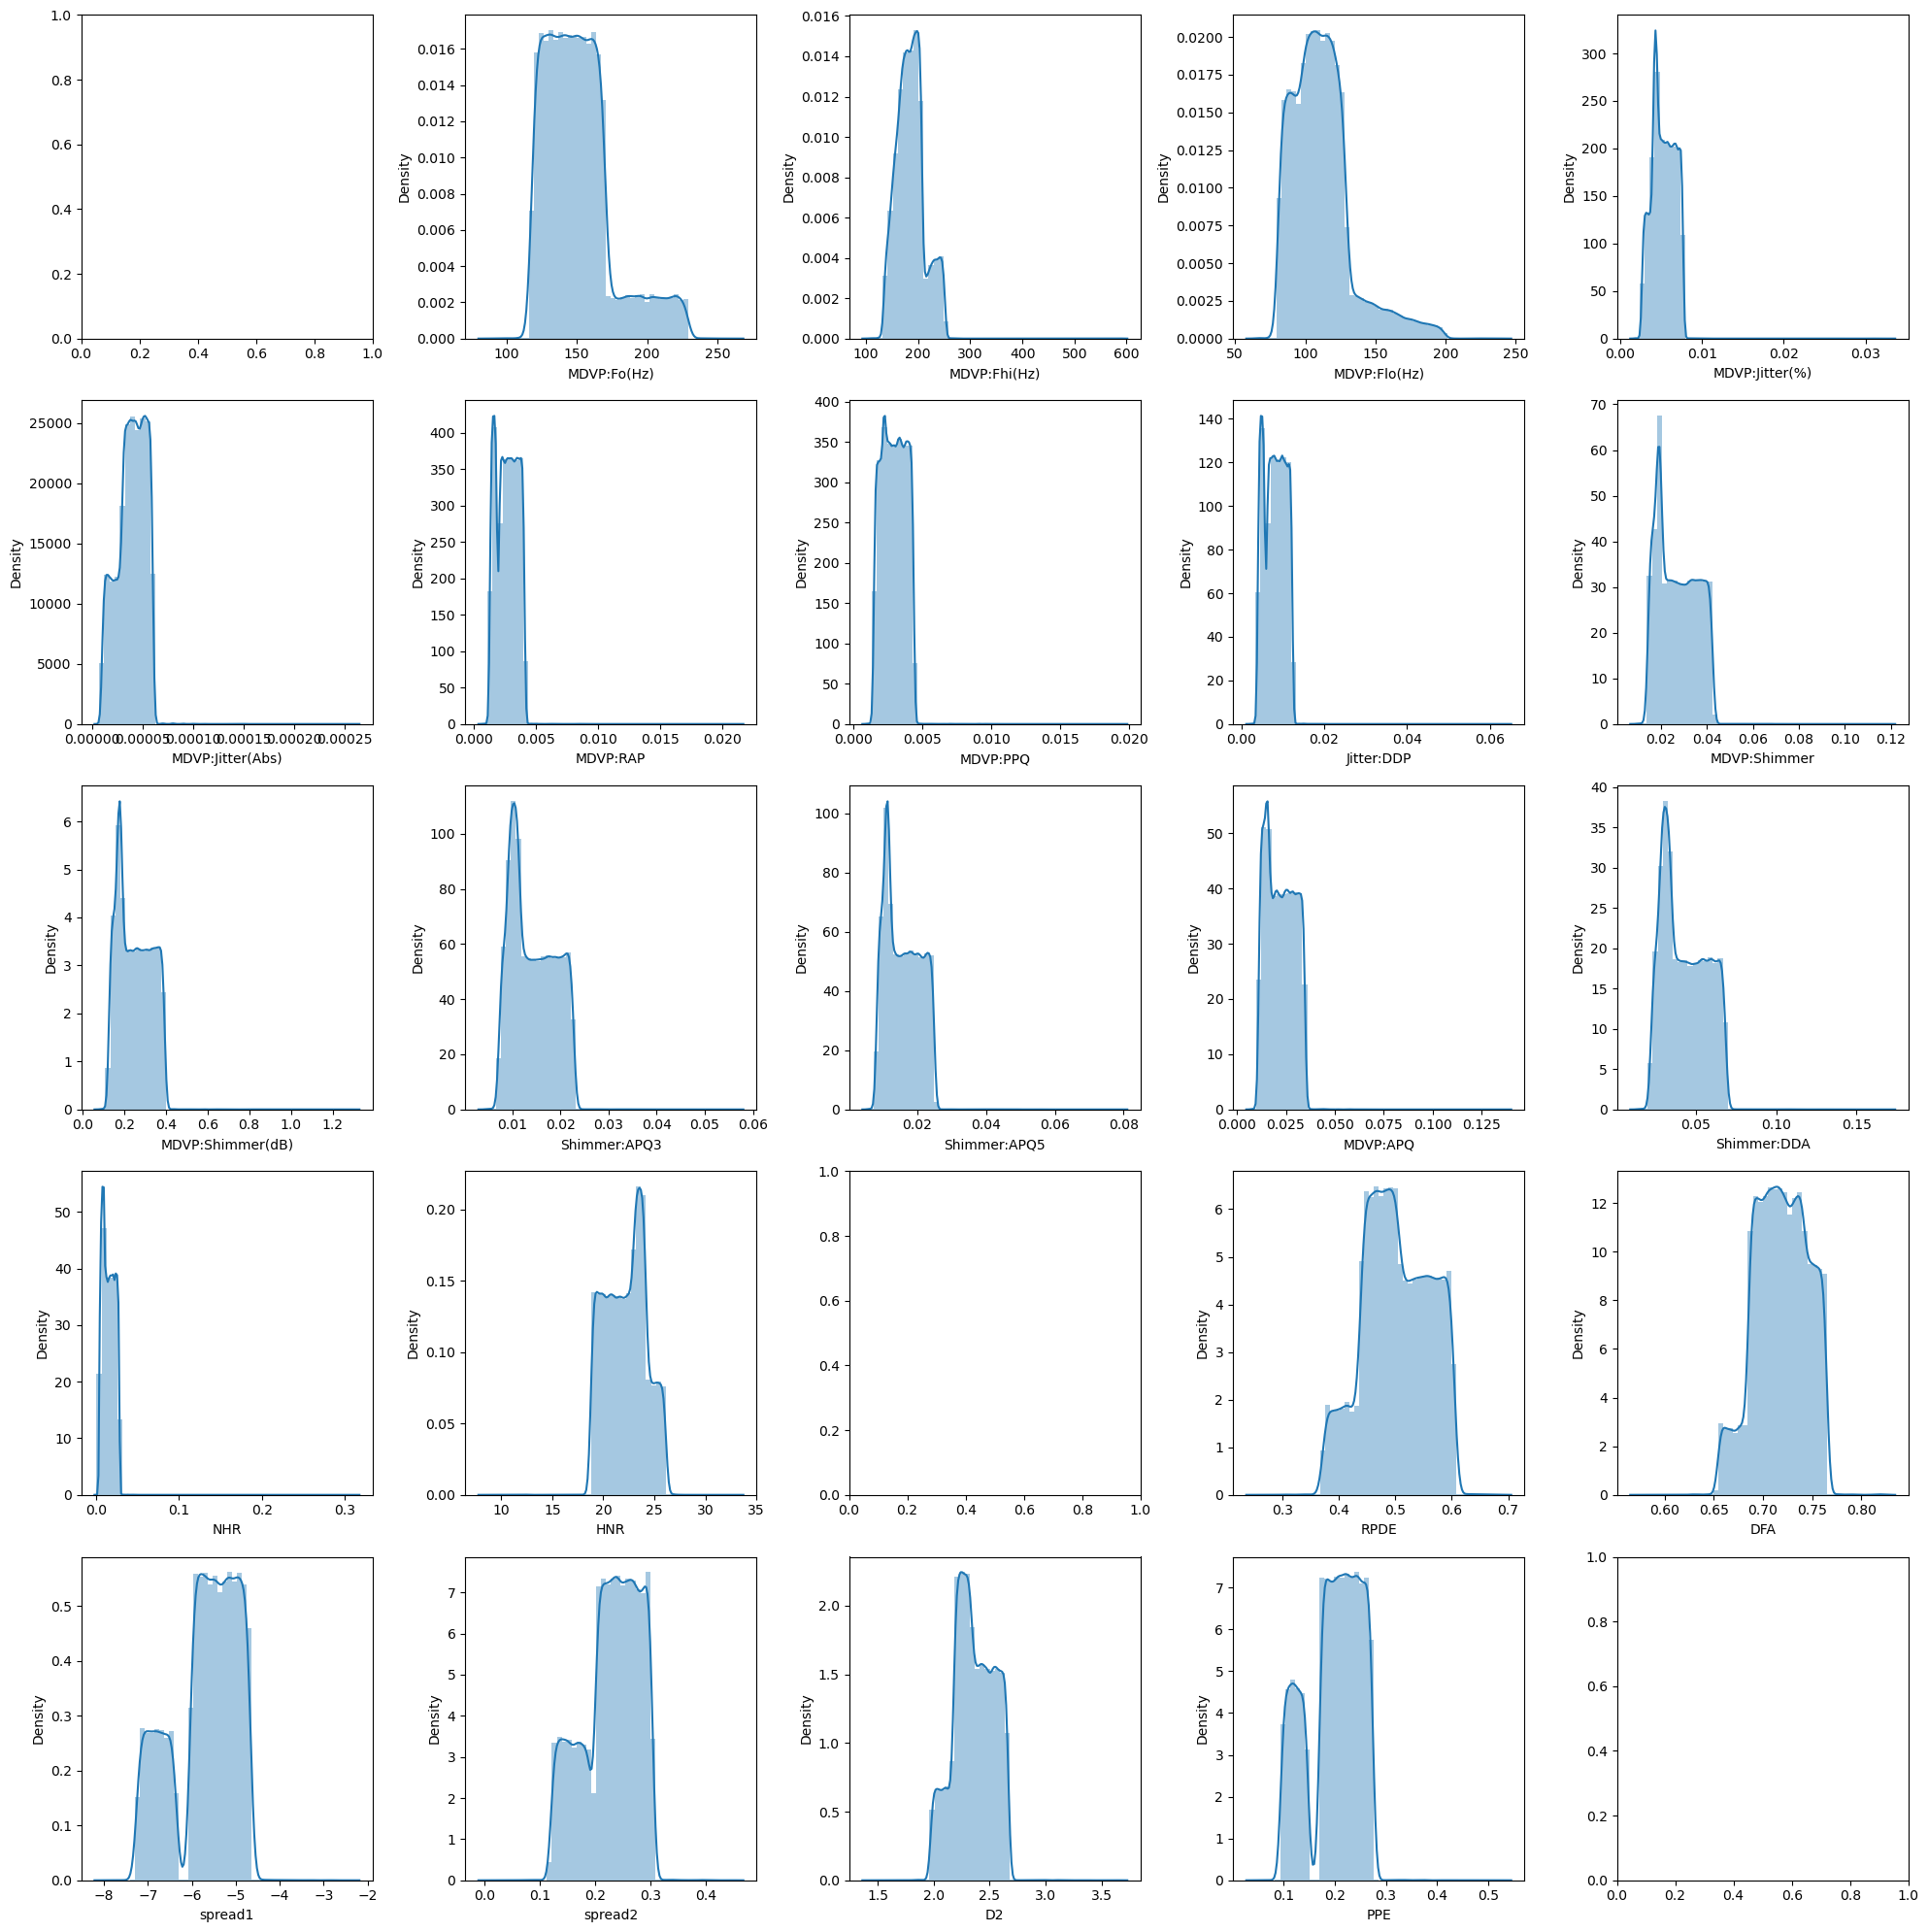

In [9]:

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Flatten axes to iterate over them
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if col != 'name' and col != 'status' and i < 25:  # Ensure only the first 25 columns are plotted
        sns.distplot(df[col], ax=axes[i])
        
        
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [10]:
for col in df.columns:
    if col!='name' and col!='status':
        print(col,":",df[col].skew())

MDVP:Fo(Hz) : 1.1004163074078517
MDVP:Fhi(Hz) : 0.8048670361409392
MDVP:Flo(Hz) : 1.3108085531444638
MDVP:Jitter(%) : 0.5897397863450734
MDVP:Jitter(Abs) : -0.1666210418833026
MDVP:RAP : 0.6476440177350559
MDVP:PPQ : 0.48569077240765063
Jitter:DDP : 0.6560068909270166
MDVP:Shimmer : 0.28851262566412317
MDVP:Shimmer(dB) : 0.3258613364052485
Shimmer:APQ3 : 0.34541622583648823
Shimmer:APQ5 : 0.3338295508448402
MDVP:APQ : 0.2651948559664276
Shimmer:DDA : 0.3488409339524843
NHR : 3.1208414509394355
HNR : -0.02234931607476158
RPDE : -0.09468925982211623
DFA : -0.19397189330536713
spread1 : -0.5579875067783984
spread2 : -0.45548294404082984
D2 : -0.07002421010907359
PPE : -0.41777429207601696


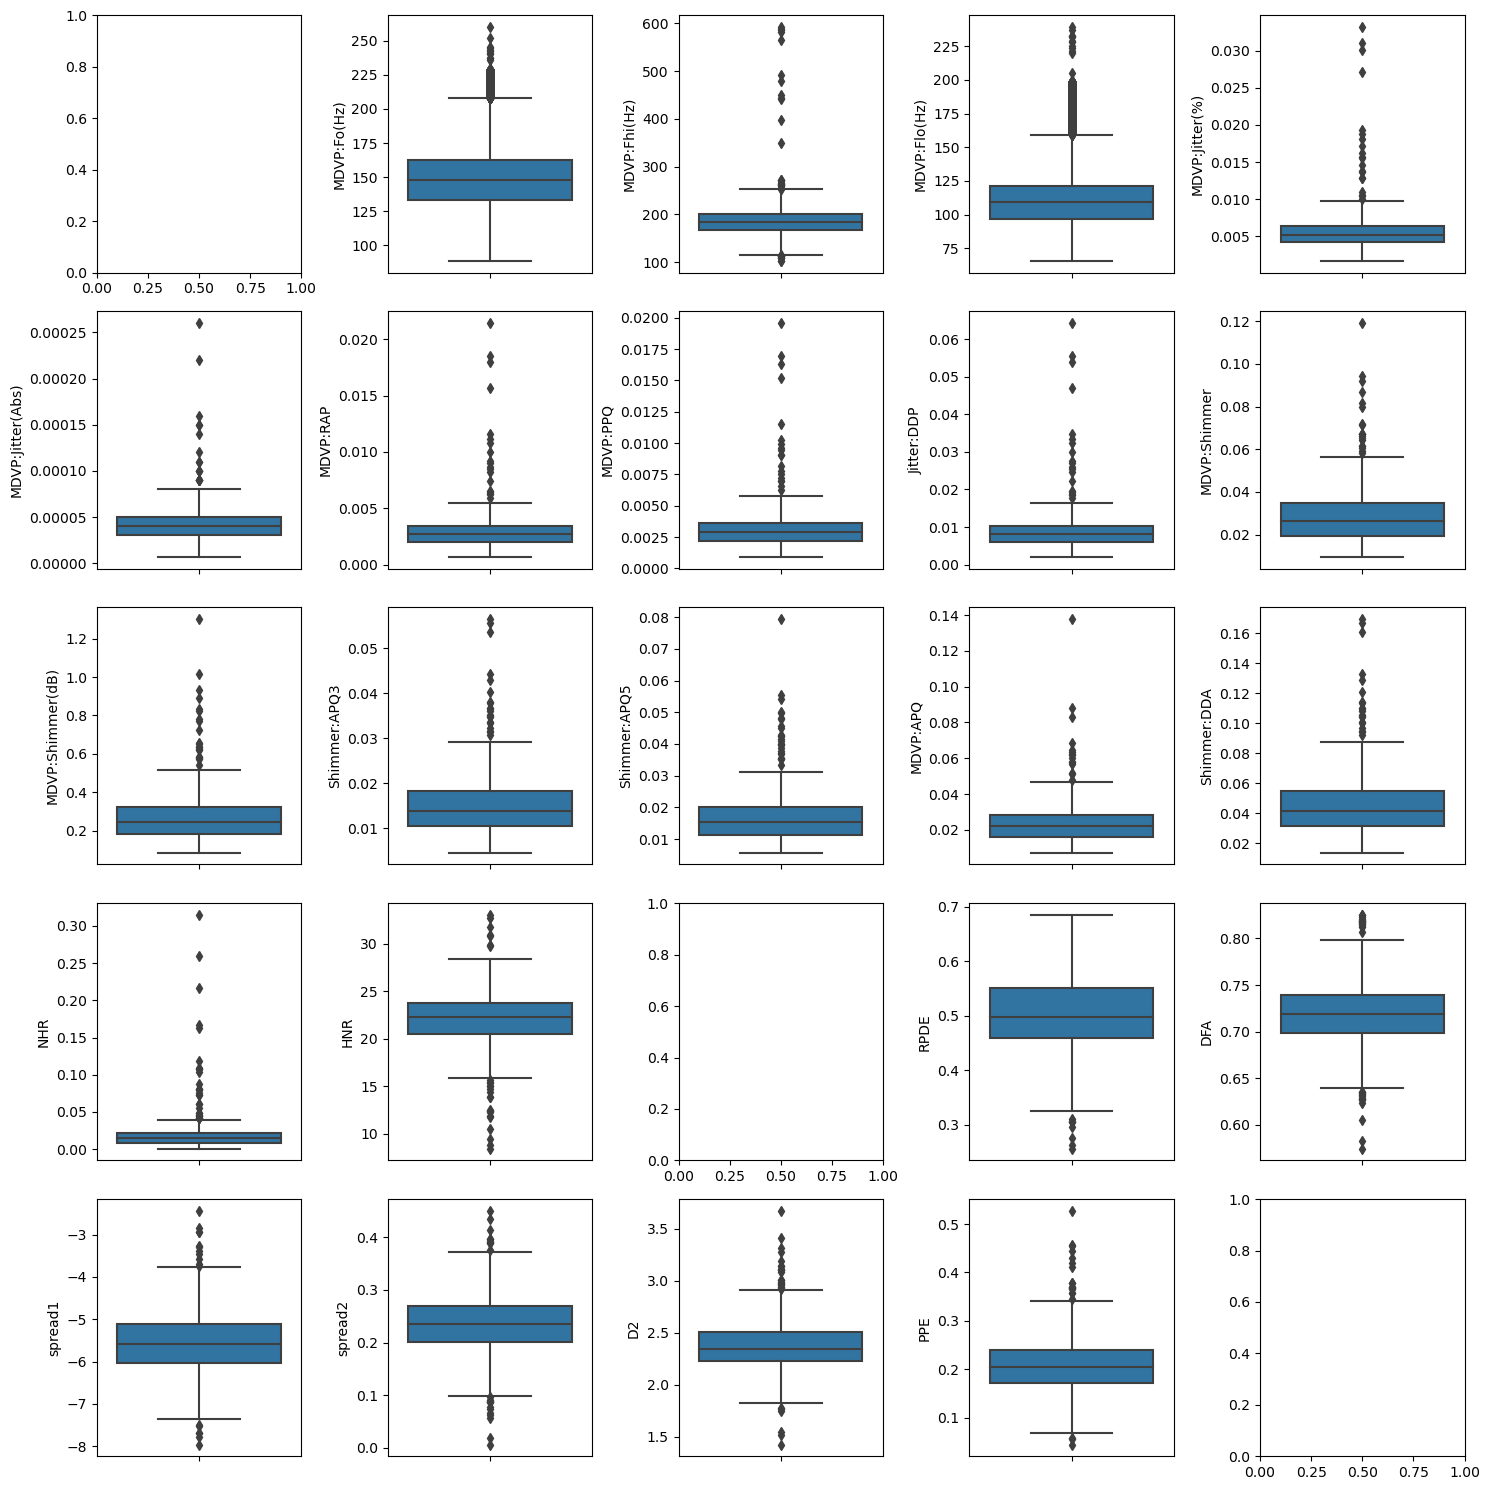

In [11]:
# Assuming df is your DataFrame
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # Adjust the number of rows and columns as needed
axes = axes.flatten()

for i, col in enumerate(df.columns):  # Iterate using enumerate
    if col != 'name' and col != 'status':
        sns.boxplot(y=df[col], ax=axes[i])

plt.tight_layout()
plt.show()


# Function to Cap Outliers

In [12]:
def cap_outliers(df, factor=1.5):
    capped_df = df.copy()
    for col in df.columns:
        if col != 'status':  # Assuming 'status' is your target variable and should not be capped
            # Calculate IQR and lower/upper bounds
            Q1 = np.quantile(df[col], 0.25)
            Q3 = np.quantile(df[col], 0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR

            # Cap outliers
            capped_df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                                      np.clip(df[col], lower_bound, upper_bound),
                                      df[col])
            
    return capped_df


In [13]:
df_capped=cap_outliers(df.drop('name',axis=1), factor=1.5)

In [14]:
df_capped

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,...,0.065450,0.022110,21.033000,1,0.414783,0.800264,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.005780,0.013940,0.057253,0.531144,...,0.090609,0.019290,19.085000,1,0.458359,0.800264,-4.075192,0.335590,2.486855,0.343386
2,116.682000,131.111000,111.555000,0.009790,0.000080,0.005440,0.005780,0.016330,0.052330,0.482000,...,0.082700,0.013090,20.651000,1,0.429895,0.800264,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009790,0.000080,0.005020,0.005780,0.015050,0.054920,0.517000,...,0.087710,0.013530,20.644000,1,0.434969,0.800264,-4.117501,0.334147,2.405554,0.343386
4,116.014000,141.781000,110.655000,0.009790,0.000080,0.005479,0.005780,0.016383,0.057253,0.531144,...,0.090609,0.017670,19.649000,1,0.417356,0.800264,-3.759216,0.234513,2.332180,0.343386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49915,207.881386,218.848030,106.848330,0.003417,0.000016,0.001874,0.001608,0.004609,0.018562,0.189116,...,0.029725,0.007732,24.478507,0,0.457684,0.665491,-6.919550,0.166218,2.195460,0.115060
49916,139.383457,233.446129,122.545508,0.004173,0.000024,0.001527,0.002163,0.004809,0.014844,0.168634,...,0.032885,0.008470,25.689257,0,0.429193,0.678586,-7.085170,0.143165,2.327750,0.142278
49917,142.838884,164.121441,142.831336,0.003069,0.000017,0.001681,0.001550,0.004202,0.019759,0.136099,...,0.033236,0.009020,25.184618,0,0.475257,0.661888,-6.452211,0.122596,2.320571,0.133969
49918,198.539585,200.670620,115.821643,0.004218,0.000014,0.001662,0.002182,0.004189,0.018521,0.137296,...,0.032074,0.008123,25.489967,0,0.402376,0.709122,-7.186943,0.167651,2.241980,0.119959


# After Capping

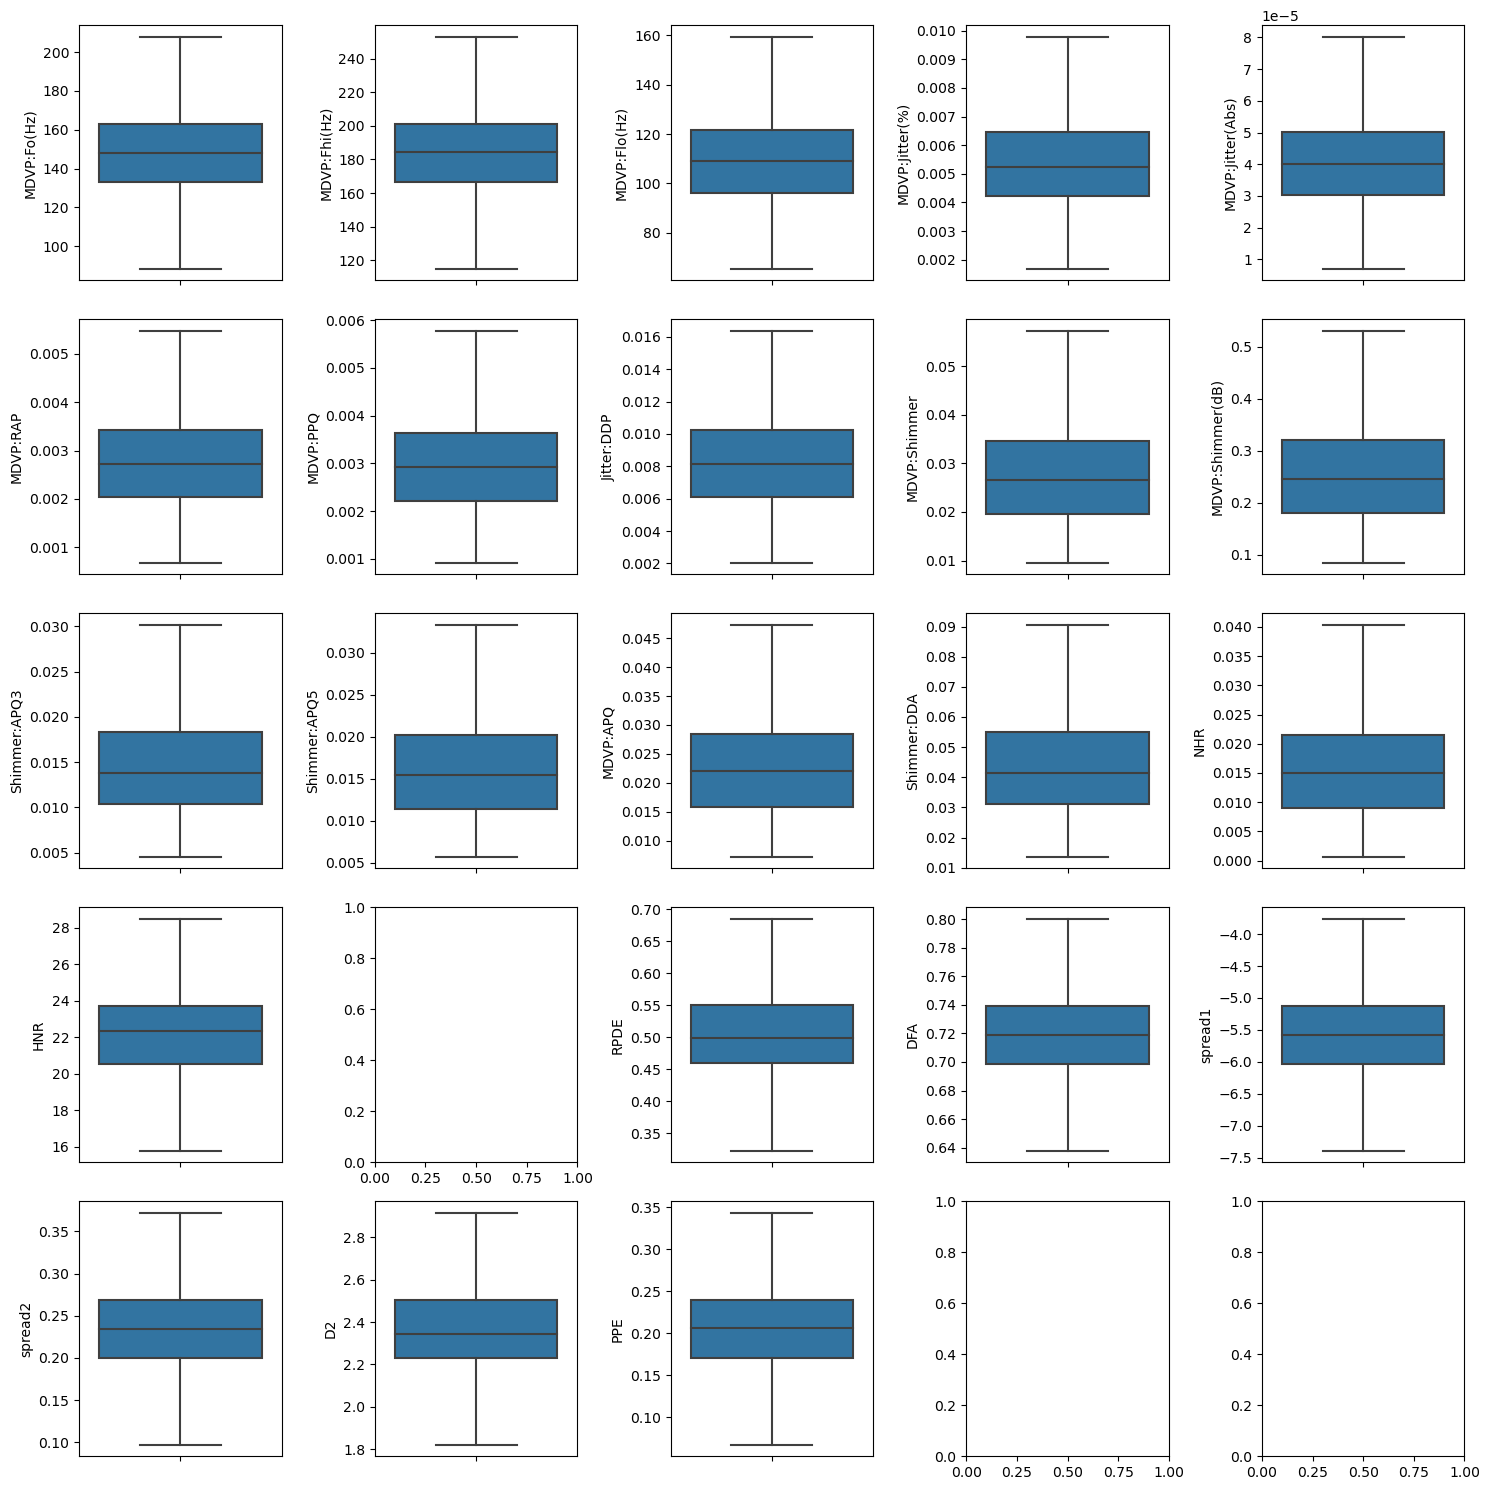

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # Adjust the number of rows and columns as needed
axes = axes.flatten()

for i, col in enumerate(df_capped.columns):  # Iterate using enumerate
    if col != 'status':
        sns.boxplot(y=df_capped[col], ax=axes[i])

plt.tight_layout()
plt.show()

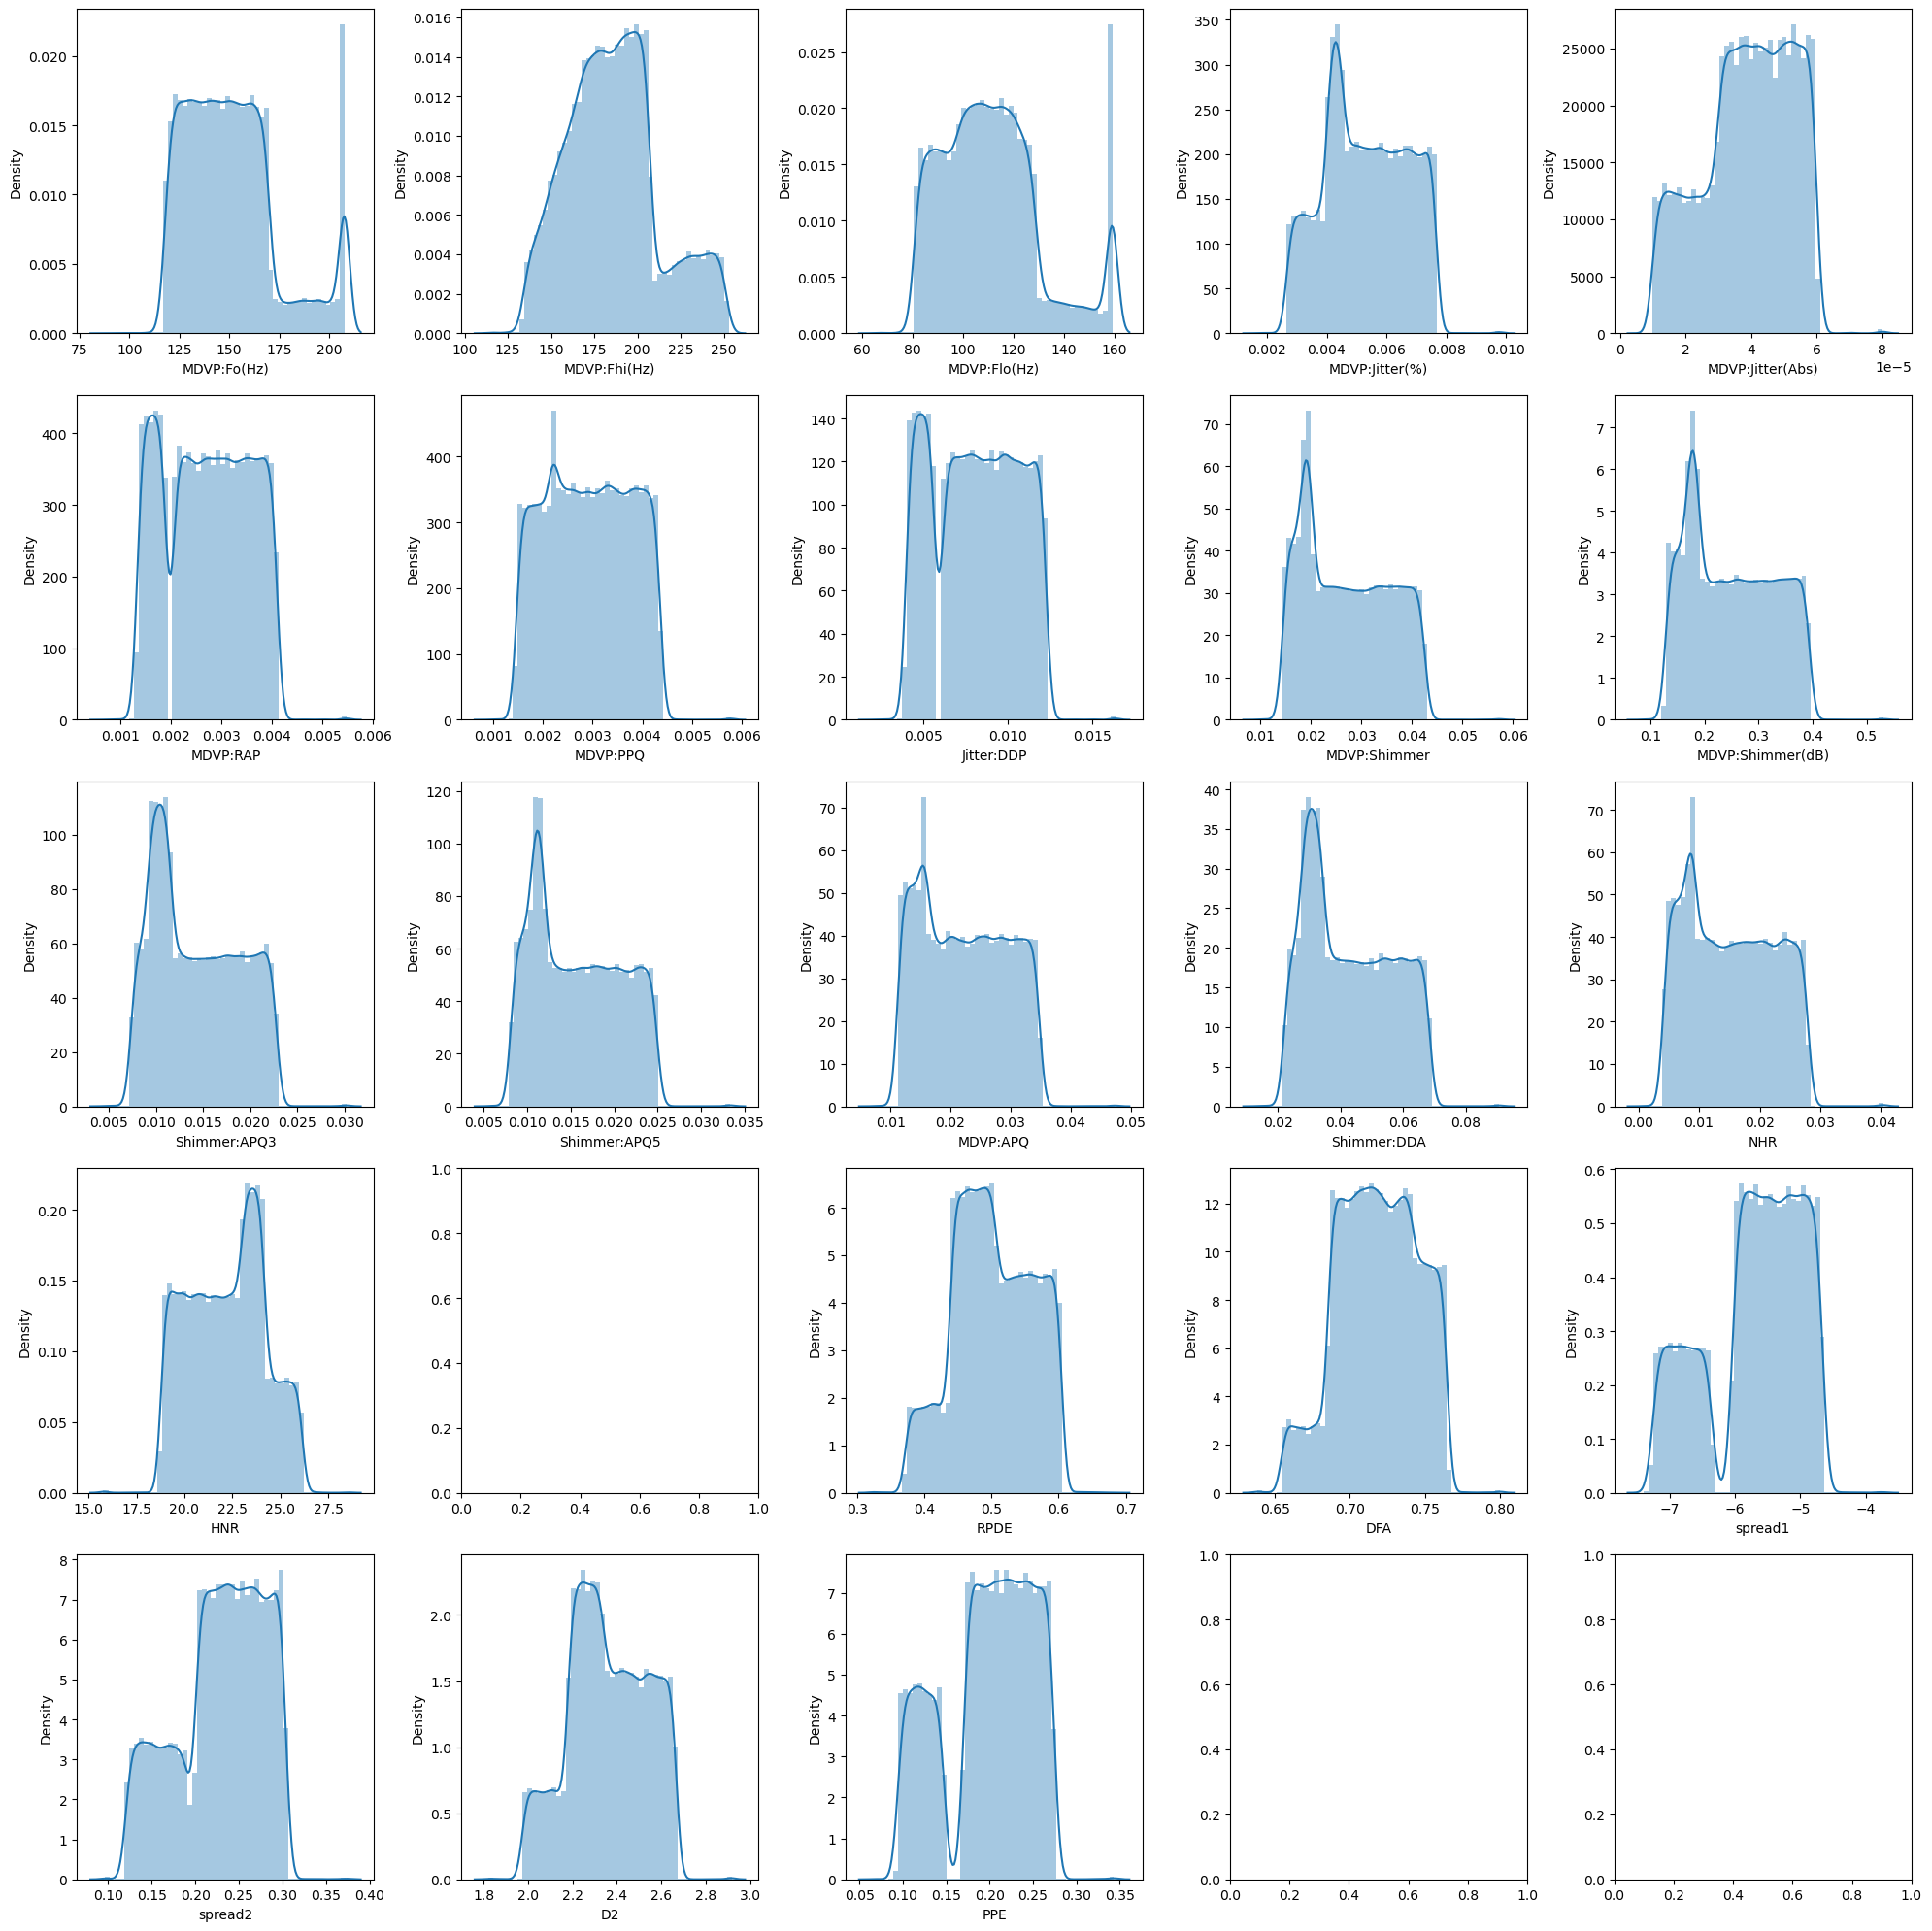

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Flatten axes to iterate over them
axes = axes.flatten()

# Iterate over columns
for i, col in enumerate(df_capped.columns):
    if col != 'status' and i < 25:  # Ensure only the first 25 columns are plotted
        
        sns.distplot(df_capped[col], ax=axes[i])
        
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [17]:
for col in df_capped.columns:
    if col!='status':
        print(col,":",df_capped[col].skew())

MDVP:Fo(Hz) : 0.860729323179522
MDVP:Fhi(Hz) : 0.3958362513421737
MDVP:Flo(Hz) : 0.7475694279466494
MDVP:Jitter(%) : 0.009066970172018478
MDVP:Jitter(Abs) : -0.35986888675908973
MDVP:RAP : -0.021393753651287078
MDVP:PPQ : 0.012936677729466519
Jitter:DDP : -0.016791329516776192
MDVP:Shimmer : 0.22395732415121689
MDVP:Shimmer(dB) : 0.20959096951326384
Shimmer:APQ3 : 0.28409809760611443
Shimmer:APQ5 : 0.23576573835070466
MDVP:APQ : 0.13039060910004244
Shimmer:DDA : 0.2872778411621065
NHR : 0.1516362895534967
HNR : 0.0019202883434166834
RPDE : -0.09177738958668223
DFA : -0.19406004071463148
spread1 : -0.5628800489046599
spread2 : -0.4565146682389013
D2 : -0.08844219560722583
PPE : -0.4349693950290334


# To Find Coorelation

In [18]:
correlation_matrix = df_capped.drop(['status'], axis=1).corr()

In [19]:
correlation_matrix

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.605232,0.503417,-0.386562,-0.439679,-0.410815,-0.403699,-0.411270,-0.366821,-0.359546,...,-0.386362,-0.342971,-0.380046,0.372997,-0.334428,-0.245403,-0.471507,-0.445002,-0.344076,-0.463239
MDVP:Fhi(Hz),0.605232,1.000000,0.425558,-0.418727,-0.476531,-0.451541,-0.438032,-0.448063,-0.403497,-0.394112,...,-0.420014,-0.375551,-0.418886,0.402056,-0.365763,-0.268198,-0.510210,-0.488995,-0.375218,-0.504747
MDVP:Flo(Hz),0.503417,0.425558,1.000000,-0.424472,-0.474724,-0.449176,-0.444570,-0.449149,-0.401126,-0.397359,...,-0.422159,-0.370177,-0.419692,0.405296,-0.365564,-0.263771,-0.511104,-0.490734,-0.385010,-0.503823
MDVP:Jitter(%),-0.386562,-0.418727,-0.424472,1.000000,0.568283,0.543384,0.528186,0.543194,0.477986,0.478619,...,0.507281,0.448980,0.501500,-0.483546,0.434337,0.307646,0.609578,0.581246,0.459492,0.601262
MDVP:Jitter(Abs),-0.439679,-0.476531,-0.474724,0.568283,1.000000,0.612707,0.596394,0.611772,0.543172,0.542449,...,0.571486,0.504369,0.562165,-0.550127,0.491279,0.352509,0.692053,0.657922,0.517293,0.677375
MDVP:RAP,-0.410815,-0.451541,-0.449176,0.543384,0.612707,1.000000,0.568405,0.584549,0.513919,0.519239,...,0.540405,0.480418,0.540228,-0.520876,0.463163,0.334322,0.658292,0.624603,0.492818,0.645314
MDVP:PPQ,-0.403699,-0.438032,-0.444570,0.528186,0.596394,0.568405,1.000000,0.569553,0.501711,0.504920,...,0.533848,0.469217,0.527890,-0.509861,0.451180,0.329210,0.641151,0.609589,0.481145,0.627848
Jitter:DDP,-0.411270,-0.448063,-0.449149,0.543194,0.611772,0.584549,0.569553,1.000000,0.516011,0.518397,...,0.550615,0.482824,0.541238,-0.525435,0.464231,0.338071,0.658934,0.625799,0.496367,0.643767
MDVP:Shimmer,-0.366821,-0.403497,-0.401126,0.477986,0.543172,0.513919,0.501711,0.516011,1.000000,0.462429,...,0.490714,0.430621,0.482979,-0.466334,0.414077,0.303258,0.584689,0.559301,0.442599,0.573199
MDVP:Shimmer(dB),-0.359546,-0.394112,-0.397359,0.478619,0.542449,0.519239,0.504920,0.518397,0.462429,1.000000,...,0.484068,0.427634,0.480277,-0.466234,0.413608,0.294651,0.581414,0.555638,0.442983,0.579576


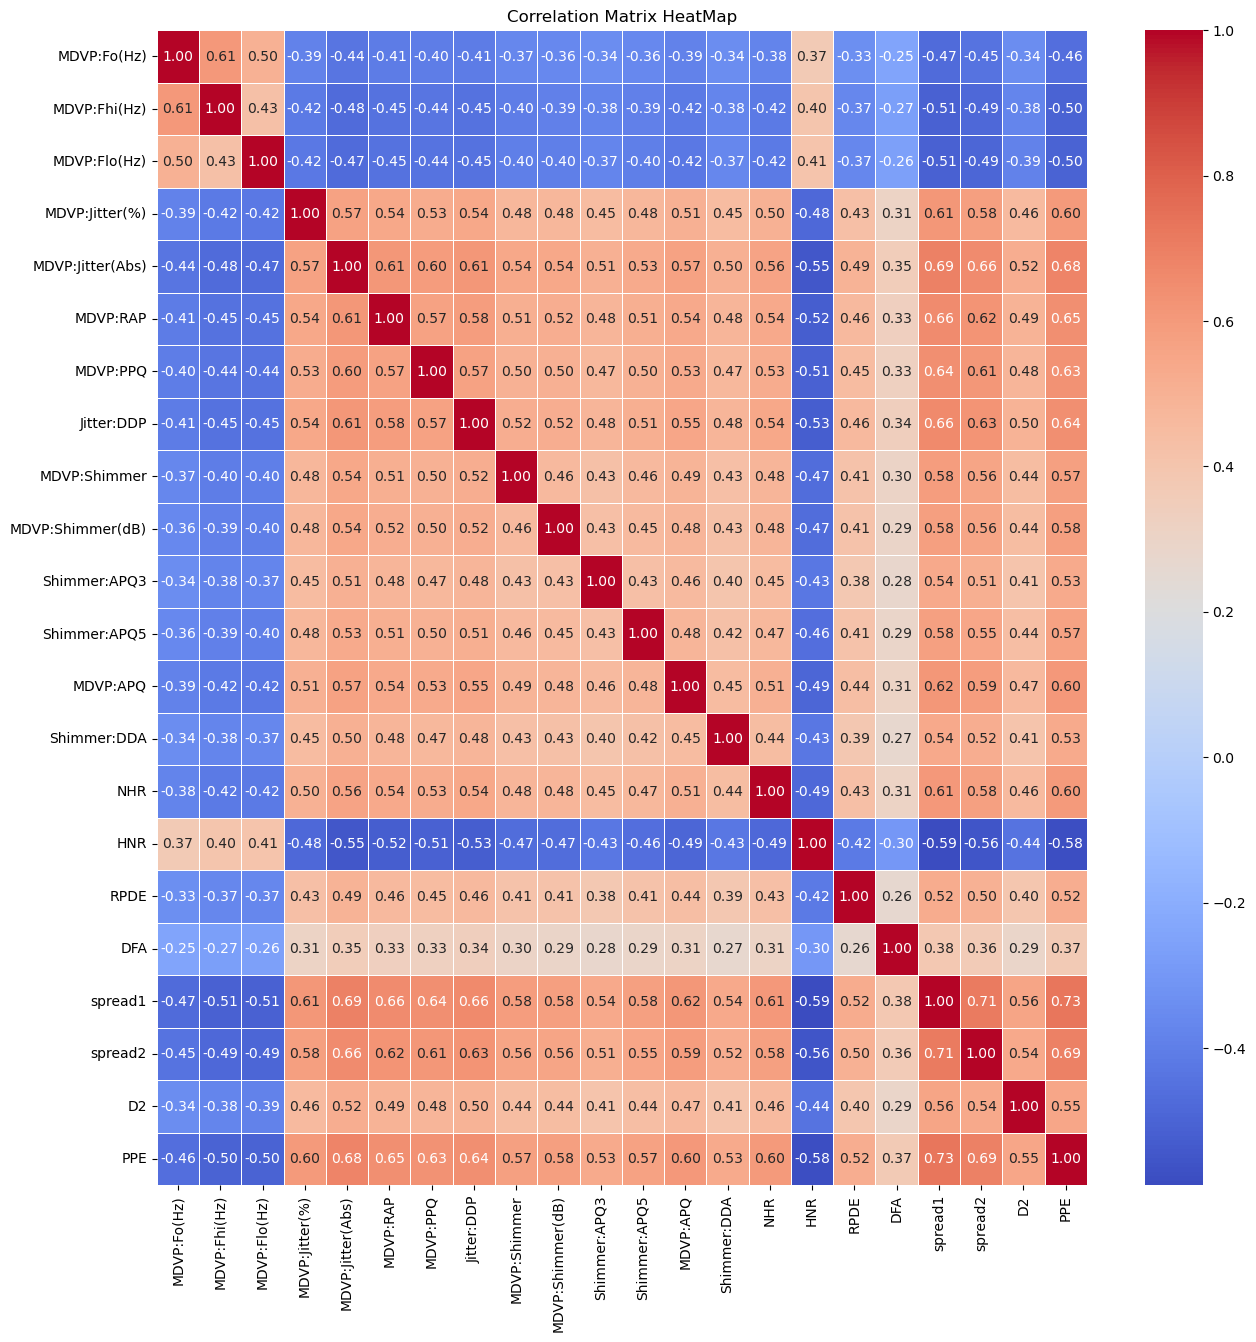

In [20]:
plt.figure(figsize=(15, 15))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Matrix HeatMap")
plt.show()

In [21]:
correlation_treshold=0.6
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] >= correlation_treshold:
            colname = correlation_matrix.columns[j]
            columns_to_drop.add(colname)

In [22]:
print(columns_to_drop)
print("No.of colums to drop are:",len(columns_to_drop))

{'Jitter:DDP', 'spread1', 'MDVP:RAP', 'PPE', 'spread2', 'MDVP:Fhi(Hz)'}
No.of colums to drop are: 6


In [23]:
df_filtered=df_capped.drop(columns=columns_to_drop)

In [24]:
df_filtered

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,D2
0,119.992000,74.997000,0.007840,0.000070,0.005540,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.800264,2.301442
1,122.400000,113.819000,0.009680,0.000080,0.005780,0.057253,0.531144,0.030196,0.033329,0.043680,0.090609,0.019290,19.085000,1,0.458359,0.800264,2.486855
2,116.682000,111.555000,0.009790,0.000080,0.005780,0.052330,0.482000,0.027570,0.033329,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.800264,2.342259
3,116.676000,111.366000,0.009790,0.000080,0.005780,0.054920,0.517000,0.029240,0.033329,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.800264,2.405554
4,116.014000,110.655000,0.009790,0.000080,0.005780,0.057253,0.531144,0.030196,0.033329,0.044650,0.090609,0.017670,19.649000,1,0.417356,0.800264,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49915,207.881386,106.848330,0.003417,0.000016,0.001608,0.018562,0.189116,0.011229,0.011013,0.012207,0.029725,0.007732,24.478507,0,0.457684,0.665491,2.195460
49916,139.383457,122.545508,0.004173,0.000024,0.002163,0.014844,0.168634,0.010187,0.011709,0.015580,0.032885,0.008470,25.689257,0,0.429193,0.678586,2.327750
49917,142.838884,142.831336,0.003069,0.000017,0.001550,0.019759,0.136099,0.008179,0.008745,0.011750,0.033236,0.009020,25.184618,0,0.475257,0.661888,2.320571
49918,198.539585,115.821643,0.004218,0.000014,0.002182,0.018521,0.137296,0.007495,0.011223,0.014291,0.032074,0.008123,25.489967,0,0.402376,0.709122,2.241980


In [25]:
df_filtered.shape

(49920, 17)

In [26]:
correaltion_matrix=df_filtered.drop(['status'],axis=1).corr()

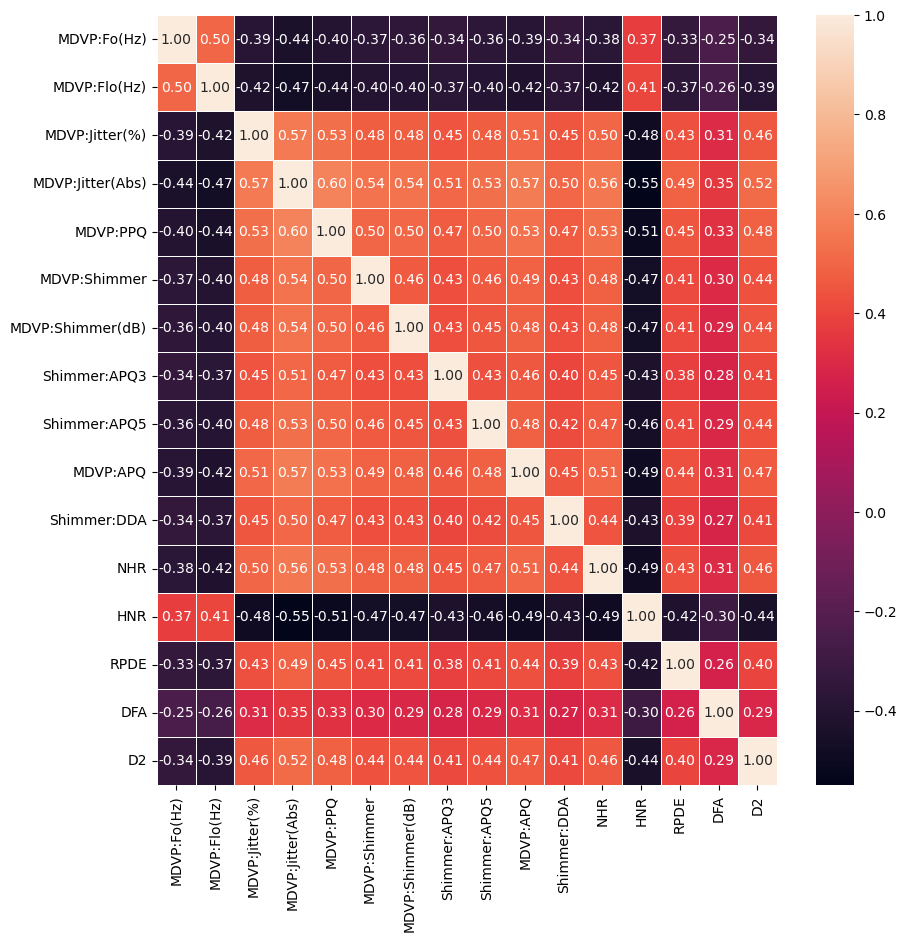

In [27]:
plt.figure(figsize=(10,10))

sns.heatmap(correaltion_matrix,annot=True,fmt='.2f',linewidth=.5)
plt.show()

In [28]:
features=df_filtered.drop(['status'],axis=1)
labels=df_filtered['status']

In [29]:
features

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,D2
0,119.992000,74.997000,0.007840,0.000070,0.005540,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,0.414783,0.800264,2.301442
1,122.400000,113.819000,0.009680,0.000080,0.005780,0.057253,0.531144,0.030196,0.033329,0.043680,0.090609,0.019290,19.085000,0.458359,0.800264,2.486855
2,116.682000,111.555000,0.009790,0.000080,0.005780,0.052330,0.482000,0.027570,0.033329,0.035900,0.082700,0.013090,20.651000,0.429895,0.800264,2.342259
3,116.676000,111.366000,0.009790,0.000080,0.005780,0.054920,0.517000,0.029240,0.033329,0.037720,0.087710,0.013530,20.644000,0.434969,0.800264,2.405554
4,116.014000,110.655000,0.009790,0.000080,0.005780,0.057253,0.531144,0.030196,0.033329,0.044650,0.090609,0.017670,19.649000,0.417356,0.800264,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49915,207.881386,106.848330,0.003417,0.000016,0.001608,0.018562,0.189116,0.011229,0.011013,0.012207,0.029725,0.007732,24.478507,0.457684,0.665491,2.195460
49916,139.383457,122.545508,0.004173,0.000024,0.002163,0.014844,0.168634,0.010187,0.011709,0.015580,0.032885,0.008470,25.689257,0.429193,0.678586,2.327750
49917,142.838884,142.831336,0.003069,0.000017,0.001550,0.019759,0.136099,0.008179,0.008745,0.011750,0.033236,0.009020,25.184618,0.475257,0.661888,2.320571
49918,198.539585,115.821643,0.004218,0.000014,0.002182,0.018521,0.137296,0.007495,0.011223,0.014291,0.032074,0.008123,25.489967,0.402376,0.709122,2.241980


In [30]:
labels

0        1
1        1
2        1
3        1
4        1
        ..
49915    0
49916    0
49917    0
49918    0
49919    0
Name: status, Length: 49920, dtype: int64

In [31]:
scaler=MinMaxScaler(feature_range=(-1,1))

scaler.fit(features)

X=scaler.transform(features)



In [32]:
X

array([[-0.47035671, -0.79720792,  0.51918196, ..., -0.49313658,
         1.        , -0.12277175],
       [-0.43007177,  0.02967938,  0.97296359, ..., -0.2524834 ,
         1.        ,  0.21559219],
       [-0.52573178, -0.01854258,  1.        , ..., -0.40967892,
         1.        , -0.04828398],
       ...,
       [-0.08813685,  0.64762622, -0.65745924, ..., -0.15916043,
        -0.70462707, -0.0878632 ],
       [ 0.84371515,  0.07233458, -0.37397002, ..., -0.56165818,
        -0.12276575, -0.23128578],
       [ 0.17750707, -0.2071373 , -0.45813246, ..., -0.71008791,
         0.25383387, -0.55406747]])

In [33]:
first_row = X[0]
print(first_row)

[-0.47035671 -0.79720792  0.51918196  0.72131148  0.90105097  0.4335796
  0.52865596  0.34681495  0.85309487  0.12192208  0.34625737  0.07996942
 -0.17428528 -0.49313658  1.         -0.12277175]


In [34]:
y=labels.values

In [35]:
y


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=7)

In [37]:
print("X_train shape:",X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (34944, 16)
y_train shape: (34944,)


In [38]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (14976, 16)
y_test shape: (14976,)


In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

X_train_resampled shape: (52950, 16)
y_train_resampled shape: (52950,)


# XGBClassifier

In [40]:
xgb_model=XGBClassifier()

xgb_model.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
xgb_train_predictions = xgb_model.predict(X_train_resampled)
xgb_test_predictions = xgb_model.predict(X_test)

In [42]:
xgb_train_accuracy = accuracy_score(y_train_resampled, xgb_train_predictions)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_precision = precision_score(y_test, xgb_test_predictions)
xgb_recall = recall_score(y_test, xgb_test_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_test_predictions)

In [43]:
print("\nXGBoost Classifier:")
print("Training Accuracy:", xgb_train_accuracy)
print("Test Accuracy:", xgb_test_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("Confusion Matrix:")
print(xgb_conf_matrix)


XGBoost Classifier:
Training Accuracy: 1.0
Test Accuracy: 0.9990651709401709
Precision: 0.9990231773377143
Recall: 0.9997334044254865
Confusion Matrix:
[[ 3712    11]
 [    3 11250]]


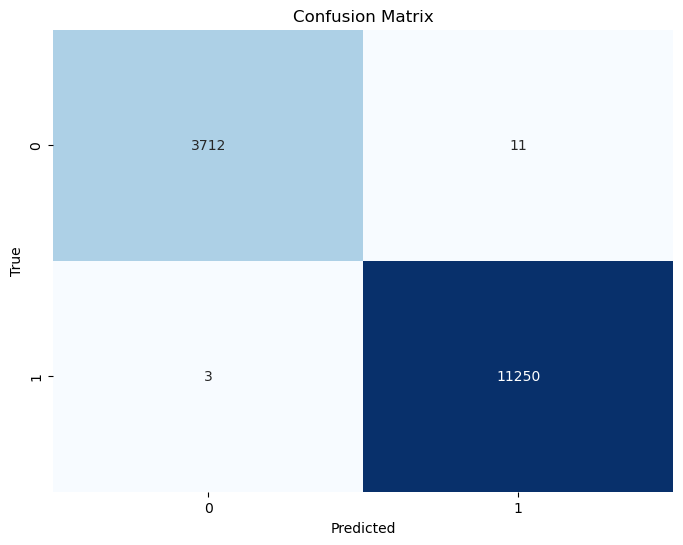

In [44]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# RandomForest Classifier

In [45]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier()

In [46]:
rf_train_predictions = rf_model.predict(X_train_resampled)
rf_test_predictions = rf_model.predict(X_test)

In [47]:
rf_train_accuracy = accuracy_score(y_train_resampled, rf_train_predictions)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_precision = precision_score(y_test, rf_test_predictions)
rf_recall = recall_score(y_test, rf_test_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_test_predictions)

In [48]:
print("Random Forest Classifier:")
print("Training Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("Confusion Matrix:")
print(rf_conf_matrix)


Random Forest Classifier:
Training Accuracy: 1.0
Test Accuracy: 0.9992654914529915
Precision: 0.9992007104795737
Recall: 0.999822269616991
Confusion Matrix:
[[ 3714     9]
 [    2 11251]]


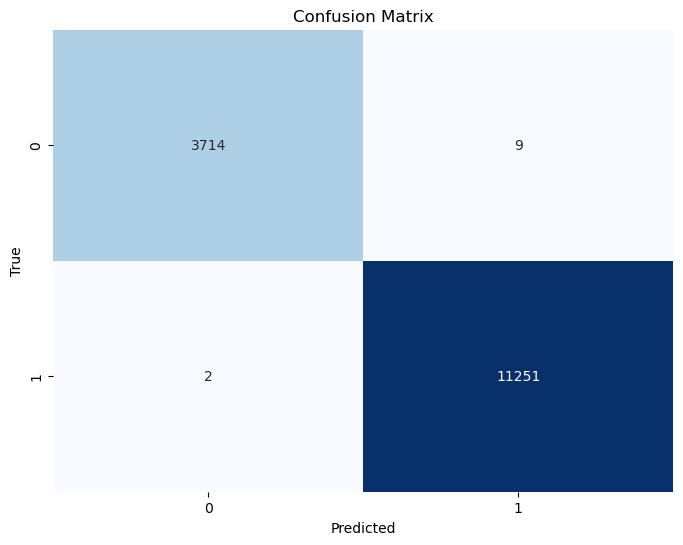

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression

In [50]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [51]:
logistic_train_predictions = logistic_classifier.predict(X_train_resampled)
logistic_test_predictions = logistic_classifier.predict(X_test)

In [52]:
# Metrics
logistic_train_accuracy = accuracy_score(y_train_resampled, logistic_train_predictions)
logistic_test_accuracy = accuracy_score(y_test, logistic_test_predictions)
logistic_precision = precision_score(y_test, logistic_test_predictions)
logistic_recall = recall_score(y_test, logistic_test_predictions)
logistic_conf_matrix = confusion_matrix(y_test, logistic_test_predictions)


In [53]:
# Print Metrics
print("Logistic Regression Classifier:")
print("Training Accuracy:", logistic_train_accuracy)
print("Test Accuracy:", logistic_test_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("Confusion Matrix:")
print(logistic_conf_matrix)

Logistic Regression Classifier:
Training Accuracy: 0.9992256846081209
Test Accuracy: 0.9991319444444444
Precision: 0.9995555555555555
Recall: 0.9992890784679641
Confusion Matrix:
[[ 3718     5]
 [    8 11245]]


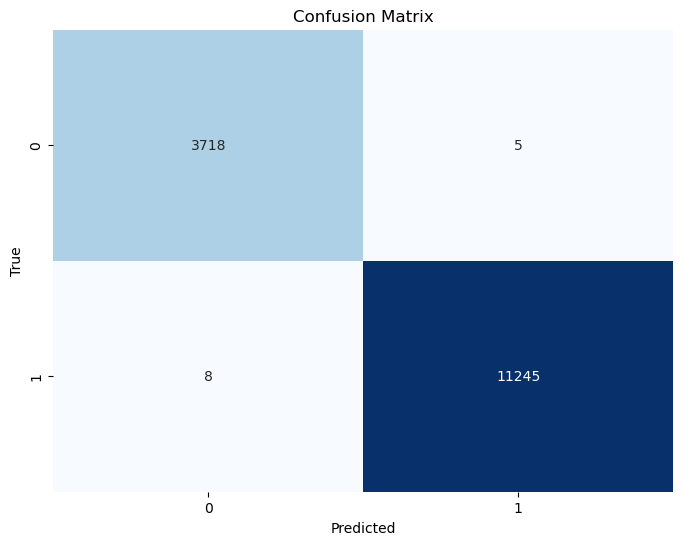

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 
           'MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 
           'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 
           'DFA', 'D2']

In [56]:
df_dup=df.drop(['name','status'],axis=1)

In [57]:
df_features=df_dup.drop(columns=columns_to_drop)

In [58]:
df_features

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,D2
0,119.992000,74.997000,0.007840,0.000070,0.005540,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,0.414783,0.815285,2.301442
1,122.400000,113.819000,0.009680,0.000080,0.006960,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,0.458359,0.819521,2.486855
2,116.682000,111.555000,0.010500,0.000090,0.007810,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,0.429895,0.825288,2.342259
3,116.676000,111.366000,0.009970,0.000090,0.006980,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,0.434969,0.819235,2.405554
4,116.014000,110.655000,0.012840,0.000110,0.009080,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49915,216.724878,106.848330,0.003417,0.000016,0.001608,0.018562,0.189116,0.011229,0.011013,0.012207,0.029725,0.007732,24.478507,0.457684,0.665491,2.195460
49916,139.383457,122.545508,0.004173,0.000024,0.002163,0.014844,0.168634,0.010187,0.011709,0.015580,0.032885,0.008470,25.689257,0.429193,0.678586,2.327750
49917,142.838884,142.831336,0.003069,0.000017,0.001550,0.019759,0.136099,0.008179,0.008745,0.011750,0.033236,0.009020,25.184618,0.475257,0.661888,2.320571
49918,198.539585,115.821643,0.004218,0.000014,0.002182,0.018521,0.137296,0.007495,0.011223,0.014291,0.032074,0.008123,25.489967,0.402376,0.709122,2.241980


In [59]:
import numpy as np

def cap_row_with_df_iqr(input_row_df, df, factor=1.5):
    capped_row = input_row_df.copy()
    for col in input_row_df.columns:
        # Calculate IQR from the original DataFrame
        Q1 = np.quantile(df_dup[col], 0.25)
        Q3 = np.quantile(df_dup[col], 0.75)
        col_iqr = Q3 - Q1
            
        # Calculate lower and upper bounds based on IQR and factor
        lower_bound = Q1 - factor * col_iqr
        upper_bound = Q3 + factor * col_iqr

        # Cap the value if it's outside the bounds
        capped_row[col] = np.clip(input_row_df[col], lower_bound, upper_bound)
    return capped_row


In [60]:
input_row=np.array([119.992,74.997,0.00784,0.00007,0.00554,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,2.301442])

In [61]:
input_row_df = pd.DataFrame([input_row], columns=columns)

In [62]:
input_row_df

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,D2
0,119.992,74.997,0.00784,0.00007,0.00554,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,2.301442


In [63]:
capped_input_row_df = cap_row_with_df_iqr(input_row_df,df_features, factor=1.5)

# Print the capped input row DataFrame
print("Capped Input Row DataFrame:")
print(capped_input_row_df)

Capped Input Row DataFrame:
   MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:PPQ  \
0      119.992        74.997         0.00784           0.00007   0.00554   

   MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
0       0.04374             0.426       0.02182        0.0313   0.02971   

   Shimmer:DDA      NHR     HNR      RPDE       DFA        D2  
0      0.06545  0.02211  21.033  0.414783  0.800264  2.301442  


In [64]:
scaled_input_row=scaler.transform(input_row_df)

In [65]:
scaled_input_row

array([[-0.47035671, -0.79720792,  0.51918196,  0.72131148,  0.90105097,
         0.4335796 ,  0.52865596,  0.34681495,  0.85309487,  0.12192208,
         0.34625737,  0.07996942, -0.17428528, -0.49313658,  1.18503628,
        -0.12277175]])

In [66]:
rf_model.predict(scaled_input_row)

array([1], dtype=int64)

In [67]:
input_row2=np.array([197.076,192.055,0.00289,0.00001,0.00168,0.01098,0.097,0.00563,0.0068,0.00802,0.01689,0.00339,26.775,0.422229,0.741367,1.743867])

In [68]:
input_row2_df = pd.DataFrame([input_row2], columns=columns)

In [69]:
capped_input_row2= cap_row_with_df_iqr(input_row2_df,df_features,1.5)

In [70]:
capped_input_row2

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,D2
0,197.076,159.375132,0.00289,0.00001,0.00168,0.01098,0.097,0.00563,0.0068,0.00802,0.01689,0.00339,26.775,0.422229,0.741367,1.820748


In [71]:
sacled_input_row2=scaler.transform(capped_input_row2)

In [72]:
sacled_input_row2

array([[ 0.81922992,  1.        , -0.70158926, -0.91803279, -0.687273  ,
        -0.93963875, -0.94620566, -0.91577532, -0.92037483, -0.9586503 ,
        -0.91555035, -0.86211015,  0.72793662, -0.45201524,  0.27445484,
        -1.        ]])

In [73]:
if np.array_equal(sacled_input_row2, X[30]):
    print("The arrays are equal.")
else:
    print("The arrays are not equal.")

The arrays are not equal.


In [74]:
 rf_model.predict(sacled_input_row2)

array([0], dtype=int64)

In [81]:
import pickle

with open('model.sav', 'wb') as file:
    pickle.dump(rf_model, file)

# Load the model
with open('model.sav', 'rb') as file:
    loaded_model = pickle.load(file)

In [82]:
with open('scaler.sav', 'wb') as scale_file:
    pickle.dump(scaler, scale_file)

# Load the model
with open('scaler.sav', 'rb') as scale_file:
    loaded_sacle = pickle.load(scale_file)